In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
#i have taken a news article regarding 9/11 attacks

# training data(news article regarding 9/11 attack)

In [2]:
url='https://www.britannica.com/event/September-11-attacks'

In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
soup = BeautifulSoup(response.text, "html.parser")

In [6]:
soup

<!DOCTYPE html>

<html class="ui-unknown0 ui-unknown" data-ytrk-page="TOPIC PAGINATED LARGE" lang="en">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="5247c07bac63b6b3250f68cfe355c9a2" name="p:domain_verify"/>
<meta content="74442380906" property="fb:pages"/>
<link href="/resources" rel="dns-prefetch"/>
<link href="/resources" rel="preconnect"/>
<meta content="September 11 attacks, series of airline hijackings and suicide attacks committed in 2001 by 19 militants associated with Islamic extremist group al-Qaeda against targets in the United States, the deadliest terrorist attacks on U.S. soil in U.S. history. Over 3,000 people died in the attacks and rescue efforts." name="description"/>
<meta content="September 11 attacks, encyclopedia, encyclopeadia, britannica, article" name="keywords"/>
<li

In [7]:
content = soup.find('div', {"class":"container"}) 
    

In [8]:
print(content)

<div class="infinite-pagination-container container">
<div class="grid">
<div class="topic-content col-sm pr-lg-60">
<script type="application/ld+json">
		{
			"@context" : "https://schema.org",
			"@type" : "BreadcrumbList",
			"itemListElement" :
			[
				
			
			{
			"@type" : "ListItem",
			"position" : 1,
			"item" :
			{
			"@id" : "https://www.britannica.com/browse/Politics-Law-Government",
			"name": "Politics, Law &amp; Government"
			}
			}
		
			,
			{
			"@type" : "ListItem",
			"position" : 2,
			"item" :
			{
			"@id" : "https://www.britannica.com/browse/Law-Crime-Punishment",
			"name": "Law, Crime &amp; Punishment"
			}
			}
		
			,
			{
			"@type" : "ListItem",
			"position" : 3,
			"item" :
			{
			"@id" : "https://www.britannica.com/browse/Crime-Terrorism",
			"name": "Crime, Terrorism &amp; Counterterrorism"
			}
			}
		
			]
		}
		</script>
<nav class="breadcrumb">
<div class="slider js-slider position-relative d-inline-flex align-items-center mw-100 breadcrumb-sli

In [9]:
article = ''
for i in content.findAll('div'):
    article = article + ' ' +  i.text


In [10]:
print(article)

 





Home
Politics, Law & Government
Law, Crime & Punishment
Crime, Terrorism & Counterterrorism









September 11 attacks
United States [2001]

WRITTEN BY

Peter L. Bergen
CNN national security analyst and director of the national security studies program at the New America Foundation. Author of The Longest War: The Enduring Conflict Between America and al-Qaeda;...


Last Updated: 

    Sep 10, 2020
See Article History


Alternative Titles:
				11/9 attacks, 9/11 terrorist attacks, September 11


 




Home
Politics, Law & Government
Law, Crime & Punishment
Crime, Terrorism & Counterterrorism









September 11 attacks
United States [2001]

WRITTEN BY

Peter L. Bergen
CNN national security analyst and director of the national security studies program at the New America Foundation. Author of The Longest War: The Enduring Conflict Between America and al-Qaeda;...


Last Updated: 

    Sep 10, 2020
See Article History


Alternative Titles:
				11/9 attacks, 9/11 terrorist attac

In [11]:
import gensim

# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess

from gensim.parsing.preprocessing import STOPWORDS

from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from nltk.stem import *
import numpy as np
np.random.seed(400)

In [12]:
def Convert(string): 
    li = list(string.split(",")) 
    return li 

In [13]:
train=Convert(article)

In [14]:
train

[' \n\n\n\n\n\nHome\nPolitics',
 ' Law & Government\nLaw',
 ' Crime & Punishment\nCrime',
 ' Terrorism & Counterterrorism\n\n\n\n\n\n\n\n\n\nSeptember 11 attacks\nUnited States [2001]\n\nWRITTEN BY\n\nPeter L. Bergen\nCNN national security analyst and director of the national security studies program at the New America Foundation. Author of The Longest War: The Enduring Conflict Between America and al-Qaeda;...\n\n\nLast Updated: \n\n    Sep 10',
 ' 2020\nSee Article History\n\n\nAlternative Titles:\n\t\t\t\t11/9 attacks',
 ' 9/11 terrorist attacks',
 ' September 11\n\n\n \n\n\n\n\nHome\nPolitics',
 ' Law & Government\nLaw',
 ' Crime & Punishment\nCrime',
 ' Terrorism & Counterterrorism\n\n\n\n\n\n\n\n\n\nSeptember 11 attacks\nUnited States [2001]\n\nWRITTEN BY\n\nPeter L. Bergen\nCNN national security analyst and director of the national security studies program at the New America Foundation. Author of The Longest War: The Enduring Conflict Between America and al-Qaeda;...\n\n\nLast U

# cleaning the data

In [15]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
            
    return result
        

In [16]:
import pandas as pd
stemmer = SnowballStemmer("english")

In [17]:
processed_docs = []

for doc in train:
    processed_docs.append(preprocess(doc))

In [18]:
len(processed_docs)

444

In [19]:
processed_docs[:2]

[['home', 'polit'], ['govern']]

# building dictionary

In [20]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [21]:
print (dictionary)

Dictionary(516 unique tokens: ['home', 'polit', 'govern', 'crime', 'punish']...)


In [22]:
count=0
for k,v in dictionary.iteritems():
    print (k, v)
    count +=1
    if count >20:
        break

0 home
1 polit
2 govern
3 crime
4 punish
5 america
6 analyst
7 attack
8 author
9 bergen
10 conflict
11 director
12 endur
13 foundat
14 longest
15 nation
16 peter
17 program
18 qaeda
19 secur
20 septemb


In [50]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(texts)) 
texts=listToString(texts)

In [51]:
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(article)

In [52]:
tokenized_word

['Home',
 'Politics',
 ',',
 'Law',
 '&',
 'Government',
 'Law',
 ',',
 'Crime',
 '&',
 'Punishment',
 'Crime',
 ',',
 'Terrorism',
 '&',
 'Counterterrorism',
 'September',
 '11',
 'attacks',
 'United',
 'States',
 '[',
 '2001',
 ']',
 'WRITTEN',
 'BY',
 'Peter',
 'L.',
 'Bergen',
 'CNN',
 'national',
 'security',
 'analyst',
 'and',
 'director',
 'of',
 'the',
 'national',
 'security',
 'studies',
 'program',
 'at',
 'the',
 'New',
 'America',
 'Foundation',
 '.',
 'Author',
 'of',
 'The',
 'Longest',
 'War',
 ':',
 'The',
 'Enduring',
 'Conflict',
 'Between',
 'America',
 'and',
 'al-Qaeda',
 ';',
 '...',
 'Last',
 'Updated',
 ':',
 'Sep',
 '10',
 ',',
 '2020',
 'See',
 'Article',
 'History',
 'Alternative',
 'Titles',
 ':',
 '11/9',
 'attacks',
 ',',
 '9/11',
 'terrorist',
 'attacks',
 ',',
 'September',
 '11',
 'Home',
 'Politics',
 ',',
 'Law',
 '&',
 'Government',
 'Law',
 ',',
 'Crime',
 '&',
 'Punishment',
 'Crime',
 ',',
 'Terrorism',
 '&',
 'Counterterrorism',
 'September',
 

In [61]:
import nltk
import string
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('punkt')
punct =string.punctuation
stop_words = set(stopwords.words('english') + ['ü','ur','4','2','im','dont','doin','ure','i','and','on','us','would',',','.'])

filtered_tokenized_text = [word for word in tokenized_word if word not in stop_words]

fdist = FreqDist(filtered_tokenized_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\COMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
fdist.most_common(5)

[('attacks', 131), ('11', 86), ('September', 72), ('The', 70), ('United', 67)]

In [68]:
fdist.most_common()[-3:]

[('scope', 2), ('Questions', 1), ('article', 1)]

# fdist showing frequency of most occured words we can see attacks is the most occured word,also u.s,osama,flight are also frequently occured

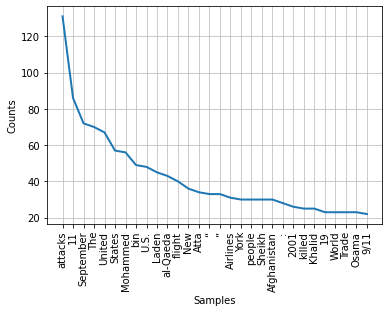

In [63]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# bow_corpus

In [23]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [24]:
bow_corpus[0]

[(0, 1), (1, 1)]

In [67]:
document_num = 10
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]],
                                                     bow_doc_x[i][1]))

Word 7 ("attack") appears 1 time.
Word 27 ("altern") appears 1 time.
Word 28 ("articl") appears 1 time.
Word 29 ("histori") appears 1 time.
Word 30 ("titl") appears 1 time.


In [26]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

# lets have a look at the topic,we can see hijack,unit,world,attack,oper,nation,york as topics

In [27]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.057*"hijack" + 0.040*"attack" + 0.037*"plan" + 0.033*"moham" + 0.025*"septemb" + 0.022*"oper" + 0.022*"khalid" + 0.022*"sheikh" + 0.019*"planner" + 0.017*"washington"


Topic: 1 
Words: 0.048*"unit" + 0.048*"state" + 0.045*"attack" + 0.022*"secur" + 0.022*"measur" + 0.022*"consider" + 0.022*"tighten" + 0.019*"terrorist" + 0.018*"commiss" + 0.018*"hand"


Topic: 2 
Words: 0.045*"world" + 0.045*"trade" + 0.045*"center" + 0.035*"airlin" + 0.034*"septemb" + 0.030*"flight" + 0.028*"kill" + 0.028*"victim" + 0.025*"number" + 0.024*"attack"


Topic: 3 
Words: 0.093*"attack" + 0.045*"terrorist" + 0.043*"airlin" + 0.037*"unit" + 0.029*"flight" + 0.025*"near" + 0.025*"qaeda" + 0.024*"septemb" + 0.021*"respons" + 0.019*"american"


Topic: 4 
Words: 0.031*"oper" + 0.026*"support" + 0.023*"qaeda" + 0.022*"terrorist" + 0.022*"moham" + 0.020*"leader" + 0.019*"attack" + 0.018*"terror" + 0.018*"atta" + 0.016*"osama"


Topic: 5 
Words: 0.046*"attack" + 0.036*"unit" + 0.036*"state" + 0.

# testing data(also a short article about 9/11)

In [28]:
url='https://www.dnaindia.com/world/photo-gallery-19-years-of-911-seven-things-you-didn-t-know-about-september-11-attack-2842362'

In [29]:
response = requests.get(url)

In [30]:
soup = BeautifulSoup(response.text, "html.parser")

In [31]:
content = soup.find('div',{"class":"phtgalhedbx"})
 

In [32]:
print(content)

<div class="phtgalhedbx">
<h1>19 years of 9/11: Seven things you didn't know about September 11 attack</h1>
<p style=" font-family: 'roboto'; margin-top: 10px">Nineteen years ago, terrorist attacks in the United States on this day changed the world at large.</p>
<ul>
<li>DNA Web Team</li>
<li>Sep 11, 2020, 08:24 AM IST</li>
</ul>
<div class="sldbody" style="font-family: 'roboto'; margin: 15px 0">
<p>On September 11, 2001, two planes were flown into the famous twin towers of the World Trade Center in New York City. 19 terrorists associated with the Islamic extremist group al-Qaeda hijacked four airplanes and carried out suicide attacks against targets in the United States. The third plane hit the Pentagon just outside Washington, DC, and the fourth plane crashed in a field in Pennsylvania. Over 3,000 people were killed during the 9/11 terrorist attacks. The 9/11 attack triggered major US initiatives to combat terrorism.</p>
<p>19 years ago at 8.45 am on a Tuesday morning, an American Ai

In [33]:
article2 = ''
for i in content.findAll('div'):
    article2 = article2 + ' ' +  i.text
print(article2)


 
On September 11, 2001, two planes were flown into the famous twin towers of the World Trade Center in New York City. 19 terrorists associated with the Islamic extremist group al-Qaeda hijacked four airplanes and carried out suicide attacks against targets in the United States. The third plane hit the Pentagon just outside Washington, DC, and the fourth plane crashed in a field in Pennsylvania. Over 3,000 people were killed during the 9/11 terrorist attacks. The 9/11 attack triggered major US initiatives to combat terrorism.
19 years ago at 8.45 am on a Tuesday morning, an American Airlines Boeing 767 loaded with 20,000 gallons of jet fuel crashed into the north of World Trade Centre. The 80th floor of the 110-story skyscraper was left burning and thousands of people lost their lives. Hundreds of people got trapped on the higher floors. 18 minutes later, a second Boeing 767 -United Airlines Flight 175 crashed into the south tower of WTC and burnt a hole on the 60th floor. 
	 
	9/11 at

In [34]:
import gensim

# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess

from gensim.parsing.preprocessing import STOPWORDS

from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from nltk.stem import *
import numpy as np
np.random.seed(400)

In [35]:
def Convert(string): 
    li = list(string.split(",")) 
    return li 

In [36]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
            
    return result

# let's see the final topics we see hijack,unit,oper,nation,world as main topics

In [69]:
bow_vector = dictionary.doc2bow(preprocess(article2))

for index, score in sorted(lda_model[bow_vector]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 22)))

Score: 0.10892975330352783	 Topic: 0.057*"hijack" + 0.040*"attack" + 0.037*"plan" + 0.033*"moham" + 0.025*"septemb" + 0.022*"oper" + 0.022*"khalid" + 0.022*"sheikh" + 0.019*"planner" + 0.017*"washington" + 0.015*"state" + 0.015*"unit" + 0.015*"build" + 0.015*"money" + 0.012*"pentagon" + 0.012*"innov" + 0.012*"tactic" + 0.012*"involv" + 0.012*"head" + 0.012*"kill" + 0.012*"lead" + 0.012*"firefight"
Score: 0.02665266953408718	 Topic: 0.048*"unit" + 0.048*"state" + 0.045*"attack" + 0.022*"secur" + 0.022*"consider" + 0.022*"measur" + 0.022*"tighten" + 0.019*"terrorist" + 0.018*"commiss" + 0.018*"hand" + 0.018*"lade" + 0.018*"think" + 0.010*"york" + 0.009*"die" + 0.009*"hijack" + 0.009*"nation" + 0.009*"america" + 0.009*"attempt" + 0.009*"passeng" + 0.009*"plane" + 0.009*"plan" + 0.009*"believ"
Score: 0.20075379312038422	 Topic: 0.045*"world" + 0.045*"trade" + 0.045*"center" + 0.035*"airlin" + 0.034*"septemb" + 0.030*"flight" + 0.028*"kill" + 0.028*"victim" + 0.025*"number" + 0.024*"attack"